In [2]:
#Import the libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score

In [452]:
stock = pd.read_csv("C:/Users/suresh/Desktop/PYTHON ML DATA SCIENCE/Stock Prediction/Stock Data/JSWSTEEL.csv")

In [453]:
stock.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2005-03-23,JSWSTL,EQ,10.00,455.00,458.50,383.60,386.9,390.15,419.86,2087710,8.765375e+13,NaN,382057,0.1830
1,2005-03-24,JSWSTL,EQ,390.15,392.85,398.50,357.50,371.8,369.20,372.01,1226479,4.562638e+13,NaN,232172,0.1893
2,2005-03-28,JSWSTL,EQ,369.20,376.70,394.05,375.00,380.0,378.85,383.64,1235794,4.741048e+13,NaN,263415,0.2132
3,2005-03-29,JSWSTL,EQ,378.85,382.90,383.80,363.25,369.1,368.05,375.26,624072,2.341915e+13,NaN,198916,0.3187
4,2005-03-30,JSWSTL,EQ,368.05,367.00,371.90,360.05,362.7,362.15,365.13,466349,1.702775e+13,NaN,159641,0.3423


In [454]:
stock.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994 entries, 0 to 3993
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                3994 non-null   object 
 1   Symbol              3994 non-null   object 
 2   Series              3994 non-null   object 
 3   Prev Close          3994 non-null   float64
 4   Open                3994 non-null   float64
 5   High                3994 non-null   float64
 6   Low                 3994 non-null   float64
 7   Last                3994 non-null   float64
 8   Close               3994 non-null   float64
 9   VWAP                3994 non-null   float64
 10  Volume              3994 non-null   int64  
 11  Turnover            3994 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  3994 non-null   int64  
 14  %Deliverble         3994 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 468.2

In [455]:
stock.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3994.000000,3.994000e+03,3.994000e+03,2456.000000,3.994000e+03,3994.000000
mean,660.368052,661.197359,673.906072,647.724011,660.313095,660.545280,661.144362,2.680639e+06,1.176519e+14,40357.029723,6.409097e+05,0.303980
std,395.564104,395.656439,401.421790,389.648633,395.328407,395.431191,395.519572,3.942895e+06,1.658072e+14,34158.225625,9.516483e+05,0.168694
min,10.000000,143.250000,145.950000,132.500000,142.350000,140.700000,137.910000,9.694000e+03,4.703767e+11,1361.000000,6.224000e+03,0.031800
25%,286.212500,286.475000,291.137500,280.850000,286.000000,286.275000,286.140000,5.515000e+05,4.633062e+13,21350.750000,1.447090e+05,0.175425
50%,638.750000,638.425000,653.825000,623.600000,638.525000,639.550000,638.140000,1.079757e+06,8.593032e+13,32302.500000,2.910040e+05,0.262550
75%,942.837500,944.975000,964.487500,927.050000,944.837500,942.837500,944.045000,3.457287e+06,1.522540e+14,50174.500000,7.760825e+05,0.399275
max,1862.550000,1874.100000,1885.950000,1842.550000,1867.000000,1862.550000,1862.710000,7.200615e+07,4.362297e+15,667821.000000,1.791488e+07,1.000000


In [456]:
# Ensure we are working with a copy of the DataFrame to avoid the SettingWithCopyWarning
stock = stock.copy()

In [457]:
# Calculate HL_Perc and CO_Perc
stock.loc[:, 'HL_Perc'] = (stock['High'] - stock['Low']) / stock['Low'] * 100
stock.loc[:, 'CO_Perc'] = (stock['Close'] - stock['Open']) / stock['Open'] * 100

In [458]:
dates = np.array(stock["Date"])
dates_check = dates[-30:]
dates = dates[:-30]

In [459]:
stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'HL_Perc', 'CO_Perc'],
      dtype='object')

In [460]:
stock = stock[["HL_Perc", "CO_Perc", "Close", "Volume"]]

In [461]:
#Define the label column
stock["PriceNextMonth"] = stock["Close"].shift(-30)

In [462]:
stock.tail()

,HL_Perc,CO_Perc,Close,Volume,PriceNextMonth
3989,3.517430,2.149533,655.80,16506538,NaN
3990,1.876900,0.794672,665.90,15799458,NaN
3991,3.896104,-1.060097,662.65,15558949,NaN
3992,9.108600,8.110119,726.50,56816962,NaN
3993,4.012931,-0.243191,717.85,36449711,NaN


In [463]:
#Make fetaure and label arrays
X = np.array(stock.drop(["PriceNextMonth"], 1))
X = preprocessing.scale(X)
X_Check = X[-30:]
X = X[:-30]
stock.dropna(inplace = True)
y = np.array(stock["PriceNextMonth"])

C:\Users\suresh\AppData\Local\Temp\ipykernel_17924\459189850.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = np.array(stock.drop(["PriceNextMonth"], 1))


In [464]:
#Divide the data set into training data and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [465]:
#Define the prediction model
model = RandomForestRegressor()

In [466]:
#Fit the model using training data
model.fit(X_train, y_train)

RandomForestRegressor()

In [467]:
#Calculate the confidence value by applying the model to testing data
conf = model.score(X_test, y_test)
print(conf)

0.8778058523977993


In [468]:
#Fit the model again using the whole data set
model.fit(X,y)

RandomForestRegressor()

In [469]:
predictions = model.predict(X_Check)

In [470]:
#Make the final DataFrame containing Dates, ClosePrices, and Forecast values
actual = pd.DataFrame(dates, columns = ["Date"])
actual["ClosePrice"] = stock["Close"]
actual["Forecast"] = np.nan
actual.set_index("Date", inplace = True)
forecast = pd.DataFrame(dates_check, columns=["Date"])
forecast["Forecast"] = predictions
forecast["ClosePrice"] = np.nan
forecast.set_index("Date", inplace = True)
var = [actual, forecast]
result = pd.concat(var)  #This is the final DataFrame

Text(0, 0.5, 'Price')

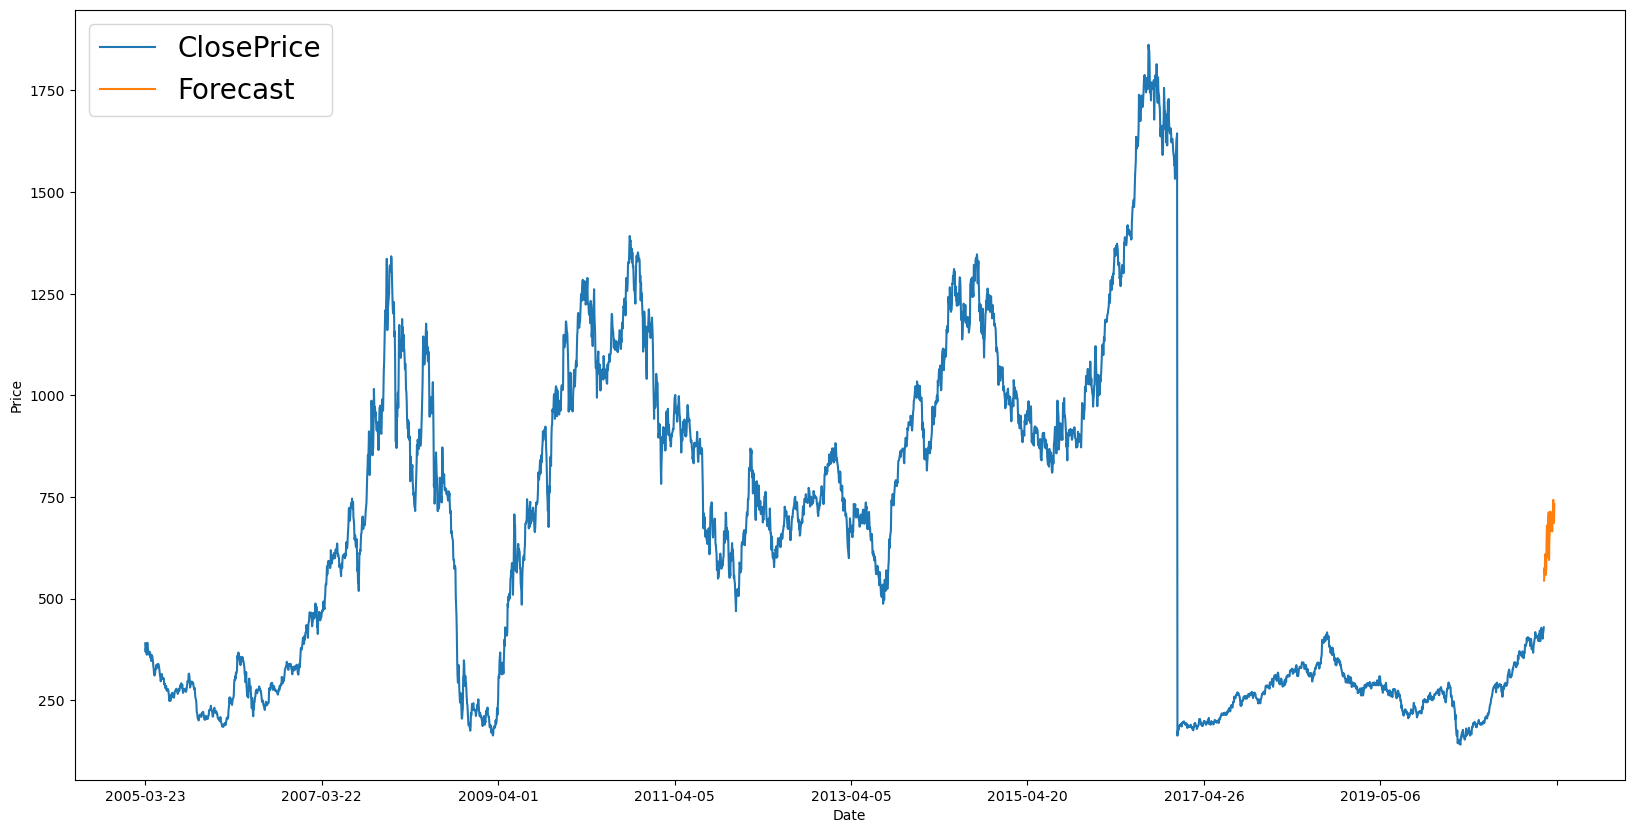

In [471]:
#Plot the final results
result.plot(figsize=(20,10), linewidth=1.5)
plt.legend(loc=2, prop={'size':20})
plt.xlabel('Date')
plt.ylabel('Price')